# Investigation on the Thomas Fire Impacts in Santa Barbara County, CA (2017 - 2018)

The following cell contains a link to my GitHub repository:

https://github.com/saingersoll/Thomas_Fire_Investigation


## Overview

On December 4, 2017, the Thomas Fire swept throughout Ventura and Santa Barbara County, CA for 40 days, devistating a total of 281,893 acres; destroying 1,063 structures and claiming two casualties (one civilian and one firefighter). Investigations have found that this wildfire was the result of a "line slap," shared between Southern California Edison powerlines during a high wind event that sparked hot materials which ignited a nearby fuel bed [Ventura County Fire Department](https://vcfd.org/news/vcfd-determines-cause-of-the-thomas-fire/). 

We are curious about the environmental and health impacts within Santa Barbara County that resulted because of the Thomas Fire. Our investigation will be exploring the Air Quality Index of SB county between 2017/01 - 2018/10. We aim to visualize the fluxuation in particular matter in correspondence to the Thomas Fire using the average over a 5 day rolling window. 

Additionally, we're interested in the burn scars remainig within SB County. To assess the environmental damages within the county, we will create a false color image using a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, gathered by the Landsat 8 satellite. 

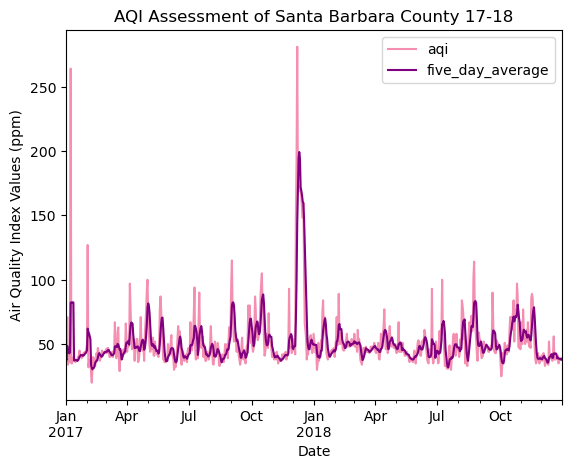 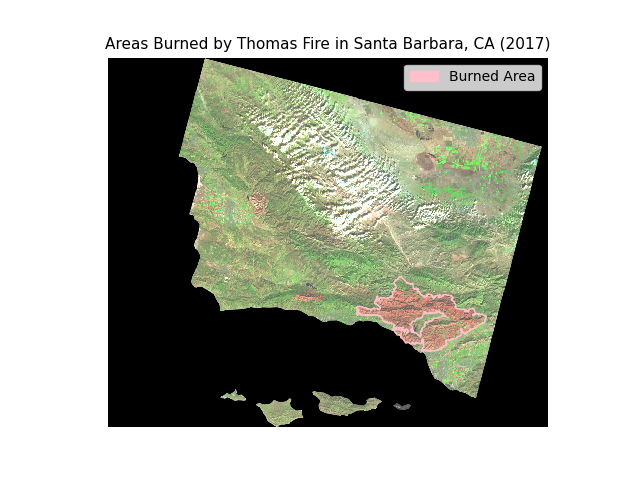

### About the data

#### AQI Data
In this notebook we will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

Citation: AirNow.gov, U.S. EPA. (n.d.). Aqi Basics. AQI Basics | AirNow.gov. https://www.airnow.gov/aqi/aqi-basics/ 

#### False Color Image Data
**First dataset**

For our false color imagine, the data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). 

Citation: Microsoft Planetary Computer. Planetary Computer. (n.d.). https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2 

*This data should be used for visualization purposes only.*

**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

Citation: California fire perimeters (all). California State Geoportal. (n.d.). https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about 

Text(0.5, 1.0, 'Areas Burned by Thomas Fire in Santa Barbara, CA (2017)')

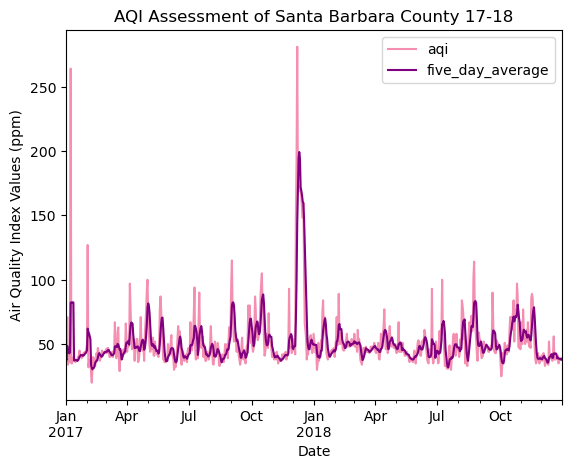

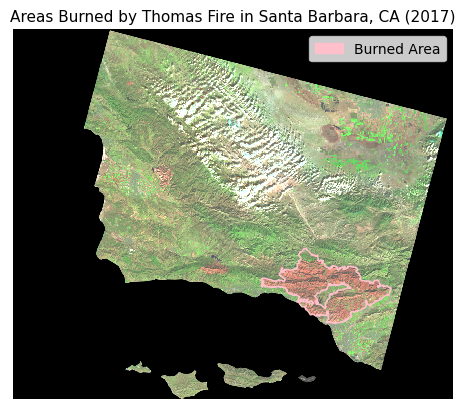

In [1]:
# Reading in Libraries
import pandas as pd                                                                                         
import matplotlib.pyplot as plt
#-----------------------------------
# Reading in the data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')                     
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')   
#-----------------------------------
# Updating data sets for plotting
aqi = pd.concat([aqi_17, aqi_18])                                                                          # glueing the datasets together

aqi.columns = aqi.columns.str.lower().str.replace(' ','_')                                                 # aqi.columns = aqi.columns.str.replace(' ','_') to replace the space for _    
                                            
    
aqi_sb = aqi.loc[aqi.county_name == 'Santa Barbara']                                                       # selecting SB county
aqi_sb = aqi_sb.iloc[:, 4:]                                                                                # isolating desired columns

aqi_sb.date = pd.to_datetime(aqi_sb.date)                                                                  # converting the date type to datetimes64
aqi_sb = aqi_sb.set_index('date')                                                                          # updating the index to the data column

aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()                                               # provides rolling window calculations of the mean aqi over 5 day periods                                                                                                         # get a pd.Series as ouput
    
colors = {'aqi':'#F48FB1',                                                                                 # creates a stored object for the y-variables of interest associated to specific colors
         'five_day_average':'purple'}

aqi_sb.plot(y = ['aqi','five_day_average'],                                                                # calls specific columns of interest to plot
           color = colors,                                                                                 # calls object of assigned colors for y-values
            title='AQI Assessment of Santa Barbara County 17-18',                                          # adds title
            xlabel='Date',                                                                                 # adds x-axis label
            ylabel='Air Quality Index Values (ppm)'                                                        # adds y-axis label
           )

# a spike in air pollutants from the Thomas fire is observed between Dec. '17 and Jan '18'    

#-----------------------------------------------------------------------------
# Reading in libraries and functions
import os
import numpy as np
import pandas as pd

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import rasterio
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-----------------------------------
# Reading in the data
landsat = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data','landsat8-2018-01-26-sb-simplified.nc')) 
ca = gpd.read_file('data/California_Fire_Perimeters_2017.shp')
#-----------------------------------
# Updating landsat data for plotting
landsat = landsat.squeeze()                                       # remove length 1 dimension (band)
landsat = landsat.drop('band')                                    # remove coordinates associated to band

false_colors = landsat[['swir22','nir08','red']].to_array()       # subsetting the bands for the false color image as an array
#------------------------------------
# Updating CA fire boundary data for plotting
ca = ca.to_crs(landsat.rio.crs)                                   # Update CRS to match and check
thomas_fire = ca[ca['FIRE_NAME'] == 'THOMAS']                     # subsetting for the Thomas Fire
#------------------------------------
# Plotting the Thomas Fire burned areas of Santa Barbara
fig, ax = plt.subplots()                                          # creates figure for plotting
plt.axis('off')                                                   # removes plot axes
false_colors.plot.imshow(ax = ax,                                 # plots false color bands
                         robust = True)                           # includes colors
thomas_fire.plot(ax = ax,                                         # plots thomas fire burn area
       color = 'none',                                            # no color of burn area
       edgecolor = 'pink')                                         # opacity of edgecolor

fire_scar = mpatches.Patch(color = 'pink', label = 'Burned Area') # Add a figure legend
ax.legend(handles=[fire_scar])
ax.set_title('Areas Burned by Thomas Fire in Santa Barbara, CA (2017)', fontsize = 11) # Adds title


# Loading Libraries and Functions

In [2]:
# Reading in libraries and functions
import os
import numpy as np
import pandas as pd

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import rasterio
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Reading in the Data for AQI 

In [3]:
# Reading in the data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')                     
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')   

#### Preliminary exploration 

Below we're going to explore the `dtypes` of our columns and inspect for any issues that may require a little wrangling. 
We can see that our Date column is not stored as a `datetime64`, this would cause us greatly difficulty when trying to visualize trends over time. Additionally, the column names and structure pose potential issues, so we'll need to correct those as well.

In [4]:
# inital data insight
aqi_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB


In [5]:
aqi_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327537 entries, 0 to 327536
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 327537 non-null  object
 1   county Name                327537 non-null  object
 2   State Code                 327537 non-null  int64 
 3   County Code                327537 non-null  int64 
 4   Date                       327537 non-null  object
 5   AQI                        327537 non-null  int64 
 6   Category                   327537 non-null  object
 7   Defining Parameter         327537 non-null  object
 8   Defining Site              327537 non-null  object
 9   Number of Sites Reporting  327537 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 25.0+ MB


# Cleaning & Wrangling AQI Data 

To simplify our workflow, we're going to combine the 2017 and 2018 data sets, and wrangle a single concatonated dataset.

In [6]:
# glueing the datasets together
aqi = pd.concat([aqi_17, aqi_18])                                                                         
#  .str.replace(' ','_') to replace the space for _
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')                                                                       

##### Check-point
Is everything looking as we expect it to?

In [7]:
# checking that dataframes joined properly and column names changed
print('The number of aqi observations in 2017 were:', len(aqi_17.Date))
print('The number of aqi observations in 2018 were:', len(aqi_18.Date))
print('The number of aqi observations between 2017-2018 were:', len(aqi.date))                  # checking data frame column names

The number of aqi observations in 2017 were: 326801
The number of aqi observations in 2018 were: 327537
The number of aqi observations between 2017-2018 were: 654338


### Subsetting, Datetime Indexing, & Rolling Window Mean Calculations

Now that we have one dataset, we can select our region of interest (ROI), correct the Date `dtype` so it may be used as the`index`, and calculate the average Air Quality Index over a 5 day rolling window.

#### `loc` Subsetting

In [8]:
# Subsetting using loc
aqi_sb = aqi.loc[aqi.county_name == 'Santa Barbara']                                                       # selecting SB county
aqi_sb = aqi_sb.iloc[:, 4:]                                                                                # isolating desired columns

#### `to_datetime` & `set_index`

In [9]:
# Datetime Indexing
aqi_sb.date = pd.to_datetime(aqi_sb.date)                                                                  # converting the date type to datetimes64
aqi_sb = aqi_sb.set_index('date')                                                                          # updating the index to the data column

#### `rolling().mean()` for a 5 Day Window

In [10]:
# Rolling Window Mean Calc
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()                                               # provides rolling window calculations of the mean aqi over 5 day periods  

# AQI Visualization

## Scatter Plot of 5 Day Average AQI Assessment, Santa Barbara County (Jan 2017 - Oct 2018)

The visual below displays the mean AQI over a 5 day rolling window between January 2017 and October 2018. A spike in air pollutants between the months of December 2017 and January 2018 is clearly observed, indicating negative effects on air quality resulting from the Thomas Fire.

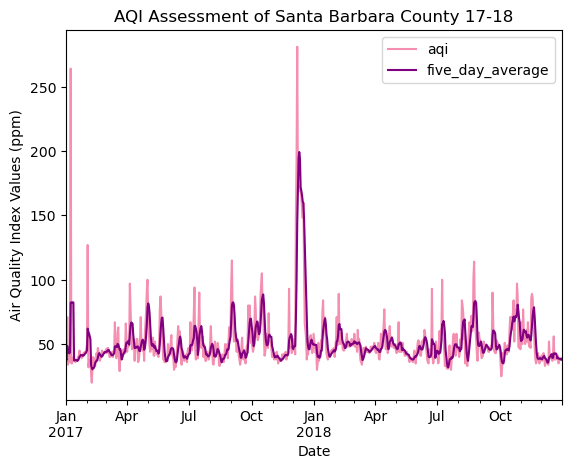

In [11]:
# Create a color palette
colors = {'aqi':'#F48FB1',                                                                                 # creates a stored object for the y-variables of interest associated to specific colors
         'five_day_average':'purple'}

# Creating a scatter plot
aqi_sb.plot(y = ['aqi','five_day_average'],                                                                # calls specific columns of interest to plot
           color = colors,                                                                                 # calls object of assigned colors for y-values
            title='AQI Assessment of Santa Barbara County 17-18',                                          # adds title
            xlabel='Date',                                                                                 # adds x-axis label
            ylabel='Air Quality Index Values (ppm)'                                                        # adds y-axis label
           )
plt.show()
# a spike in air pollutants from the Thomas fire is observed between Dec. '17 and Jan '18'    

# Reading in the Data for Landsat

In [12]:
# Reading in the data
landsat = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data','landsat8-2018-01-26-sb-simplified.nc')) 
ca_fire = gpd.read_file('data/California_Fire_Perimeters_2017.shp')

#### Preliminary exploration 

##### `landsat` Geospatial Attributes

Is our ROI provided in this spatial object? 

In [13]:
# check geospatial attributes
print('height: ', landsat.rio.height)
print('width: ', landsat.rio.width, '\n')
print(landsat.rio.bounds(), '\n')

height:  731
width:  870 

(121170.0, 3755160.0, 356070.0, 3952530.0) 



Let's take a peak at the `ca_fire` Scar Areas (2017) 

(-135250.8424303357, 695796.7353290895, 3550611.198496263, 4724902.672688211)

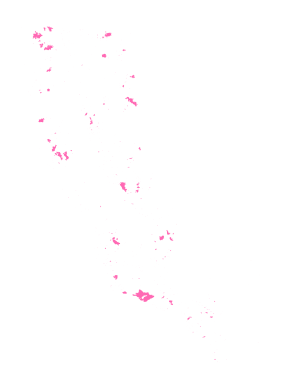

In [14]:
# confirming the dataset loaded properly by plot
fig, ax = plt.subplots()

ca.plot(ax = ax,
        color = 'hotpink')
plt.axis('off')

# Cleaning & Wrangling Landsat Data

In order to create a false color image, we need to adjust the dimensions of our data to only consider x and y coordinates. Furthermore, we will need to create an array containing the false color bands we intend on utilizing for our ROI. We'll also be correcting the CRS so we can overlay the two datasets.

#### Removing Unwanted Dimensions with `squeeze()` & `drop()` 

In [15]:
# Updating landsat data for plotting
# original dimensions and coordinates show us that band is a dimension
print(landsat.dims, landsat.coords,'\n')

# remove length 1 dimension (band)
landsat = landsat.squeeze()
print(landsat.dims, landsat.coords,'\n')

# remove coordinates associated to band
landsat = landsat.drop('band')
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870, 'band': 1}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0 

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    band         int64 1
    spatial_ref  int64 0 

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


#### Creating a landsat array subset using `to_array()`

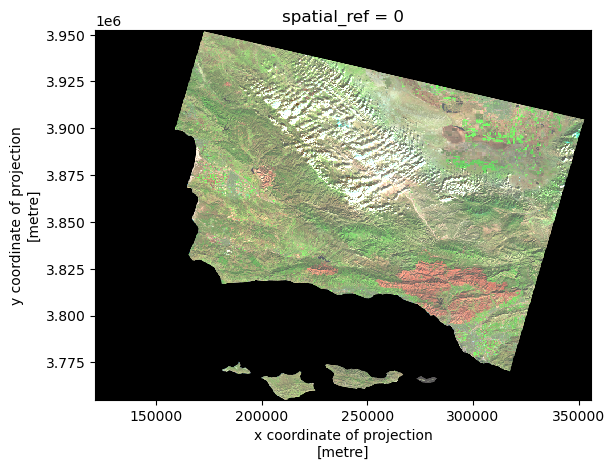

In [16]:
false_colors = landsat[['swir22','nir08','red']].to_array()       # subsetting the bands for the false color image as an array
# Plotting true color landsat
fig, ax = plt.subplots()

false_colors.plot.imshow(robust = True)

#### CRS Transformation with `to_crs()` 

In [17]:
ca_fire = ca_fire.to_crs(landsat.rio.crs)                                       # Update CRS to match and check
print('CA Fire Boundary CRS: ', ca.crs)

CA Fire Boundary CRS:  PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


#### Subset for Thomas Fire Burn Areas

(250257.01507520757, 326623.4549686163, 3793464.1971888863, 3837519.4285261673)

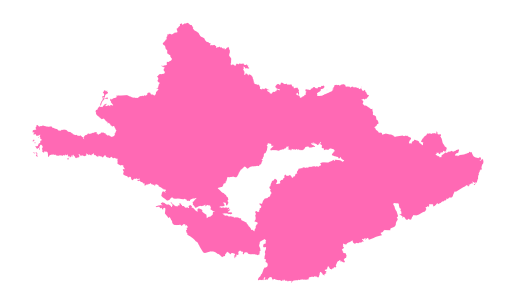

In [18]:
# Updating CA fire boundary data for plotting
thomas_fire = ca_fire[ca_fire['FIRE_NAME'] == 'THOMAS']                     # subsetting for the Thomas Fire
# Visualize the subset to confirm it properly filtered
fig, ax = plt.subplots()

thomas_fire.plot(ax = ax,
        color = 'hotpink')
plt.axis('off')

# Visualization False Color Imaging

## Thomas Fire Burned Areas in Santa Barbara County (2017)

Our false color image displays an outline of the fire scorn area of Santa Barbara County. Here, we can observe the severity of the damage by generally visualizing the area and the types of regions impacted by the wildfire. 

Text(0.5, 1.0, 'Areas Burned by Thomas Fire in Santa Barbara, CA (2017)')

<Figure size 640x200 with 0 Axes>

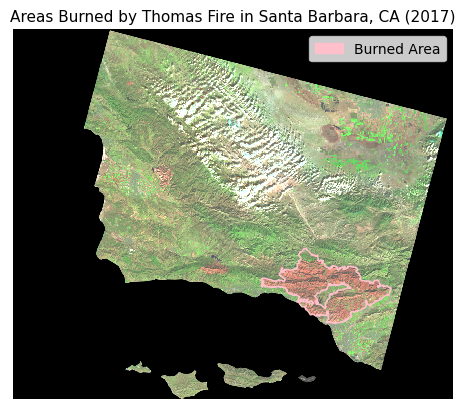

In [19]:
# Plotting the Thomas Fire burned areas of Santa Barbara
plt.figure().set_figheight(2)
fig, ax = plt.subplots()               # creates figure for plotting
plt.axis('off')                        # removes plot axes

false_colors.plot.imshow(ax = ax,      # plots false color bands
                         robust = True)# includes colors
thomas_fire.plot(ax = ax,              # plots thomas fire burn area
       color = 'none',                 # color of burn area
       edgecolor = 'pink')             # opacity of edgecolor


fire_scar = mpatches.Patch(color = 'pink', label = 'Burned Area') # Add a figure legend
ax.legend(handles=[fire_scar])
ax.set_title('Areas Burned by Thomas Fire in Santa Barbara, CA (2017)', fontsize = 11) # Adds title

### Saving Figures as a PNG

In [20]:
fig.savefig('AQI_Assessment.png')
fig.savefig('SB_Thomas_Fire.png')

Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)


Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

- [Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

- [How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)

